# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
# env = UnityEnvironment(file_name="...")
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 10):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     print(states)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         print('action')
#         print(actions)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0
Score (max over agents) from episode 6: 0.0
Score (max over agents) from episode 7: 0.0
Score (max over agents) from episode 8: 0.0
Score (max over agents) from episode 9: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from collections import namedtuple, deque
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import gym
import random
import torch
import numpy as np

In [9]:
import copy
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=128, fc2_units=128):#fc1_units=128, fc2_units=64
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
#         self.fc3 = nn.Linear(fc1_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
#         return F.tanh(self.fc3(x))
        return torch.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, num_agents, seed, fcs1_units=128, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(int(state_size*num_agents), fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+int(action_size*num_agents), fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
#         self.fc3 = nn.Linear(fcs1_units+action_size, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.relu(self.fcs1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"
print(device)

cuda:0


In [12]:
BUFFER_SIZE = int(1e6)  # replay buffer size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 1e-5     # L2 weight decay
UPDATE_EVERY = 20       # how often to update the network
NUM_OF_UPDATES = 1      # how many times to update
BATCH_SIZE = 512        # minibatch size

class DDPGAgent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, num_agents, random_seed, agent_num):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, num_agents, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, num_agents, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = OUNoise(action_size, random_seed, mu=0., theta=0.15, sigma=0.1)

        # Agent number
        self.agent_num = agent_num
    
    def act(self, state, eps, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()

        if add_noise:
#             action += self.noise.sample()    
            action += np.random.normal(0,eps,self.action_size)

        if eps > 0.333:
            action = np.random.normal(0,eps,self.action_size)

        return np.clip(action, -1, 1)             # all actions between -1 and 1

    def reset(self):
        self.noise.reset()

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.array([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.array([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.array([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.array([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.array([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [13]:
def transpose_list(mylist):
    return list(map(list, zip(*mylist)))

In [14]:
def transpose_to_tensor(mylist):
    return torch.transpose(mylist, 0, 1)

In [15]:
class MADDPGAgent:
    def __init__(self, state_size, action_size, num_agents, random_seed, discount_factor=0.95, tau=0.02):

        self.state_size = state_size
        self.action_size = action_size
        self.num_agents = num_agents
        self.seed = random.seed(random_seed)

        # make DDPG agents
#         self.maddpg_agent = [DDPGAgent(state_size, action_size, num_agents, random_seed, i) for i in range(num_agents)]
        self.maddpg_agent = [DDPGAgent(state_size, action_size, num_agents, random_seed, 0), \
                             DDPGAgent(state_size, action_size, num_agents, random_seed, 1)]
        
        self.discount_factor = discount_factor
        self.tau = tau
        self.iter = 0
        
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        
    def get_actors(self):
        """get actors of all the agents in the MADDPG object"""
        actors = [ddpg_agent.actor for ddpg_agent in self.maddpg_agent]
        return actors

    def get_target_actors(self):
        """get target_actors of all the agents in the MADDPG object"""
        target_actors = [ddpg_agent.target_actor for ddpg_agent in self.maddpg_agent]
        return target_actors

    def act(self, obs_all_agents, eps, noise=0.0):
        """get actions from all agents in the MADDPG object"""
#         actions = [agent.act(obs, noise) for agent, obs in zip(self.maddpg_agent, obs_all_agents)]
        actions = [agent.act(obs, eps) for agent, obs in zip(self.maddpg_agent, obs_all_agents)]
        return actions

    def target_act(self, obs_all_agents, noise=0.0):
        """get target network actions from all the agents in the MADDPG object """
        target_actions = [ddpg_agent.target_act(obs, noise) for ddpg_agent, obs in zip(self.maddpg_agent, obs_all_agents)]
        return target_actions
            
    def step(self, states, actions, rewards, next_states, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(states, actions, rewards, next_states, done)

        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # Learn, if enough samples are available in memory
            if len(self.memory) > BATCH_SIZE:
                for i in range(NUM_OF_UPDATES):
                    experiences = self.memory.sample()
                    self.learn(experiences, GAMMA)

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """

        states, actions, rewards, next_states, dones = experiences

        states_trns, actions_trns, rewards_trns, next_states_trns, dones_trns = map(transpose_to_tensor, experiences)

        for i, ddpg_agent in enumerate(self.maddpg_agent):

            states_i = states_trns[i]
            actions_i = actions_trns[i]
            rewards_i = rewards_trns[i]
            next_states_i = next_states_trns[i]
            dones_i = dones_trns[i]

            # ---------------------------- update critic ---------------------------- #
            # Get predicted next-state actions and Q values from target models
            actions_next = [ddpg_a.actor_target(next_s) for ddpg_a, next_s in zip(self.maddpg_agent, next_states_trns)]
            Q_targets_next = ddpg_agent.critic_target(torch.flatten(next_states, start_dim=1), torch.cat(actions_next, 1))
            # Compute Q targets for current states
            rewards_sum = sum(rewards_trns)
#             Q_targets = rewards_i.view(-1, 1) + (gamma * Q_targets_next * (1 - dones_i.view(-1, 1)))
            Q_targets = rewards_sum.view(-1, 1) + (gamma * Q_targets_next * (1 - dones_i.view(-1, 1)))
            # Compute critic loss
            Q_expected = ddpg_agent.critic_local(torch.flatten(states, start_dim=1), torch.flatten(actions, start_dim=1))
            huber_loss = torch.nn.SmoothL1Loss()
            critic_loss = huber_loss(Q_expected, Q_targets.detach())
            # Minimize the loss
            ddpg_agent.critic_optimizer.zero_grad()
            critic_loss.backward()
            torch.nn.utils.clip_grad_norm_(ddpg_agent.critic_local.parameters(), 1)
            ddpg_agent.critic_optimizer.step()

            # ---------------------------- update actor ---------------------------- #
            # Compute actor loss
            actions_pred = [ddpg_a.actor_local(states_trns[j]) if j == i else ddpg_a.actor_local(states_trns[j]).detach() \
                            for j, ddpg_a in enumerate(self.maddpg_agent)]
            actor_loss = -ddpg_agent.critic_local(torch.flatten(states, start_dim=1), torch.cat(actions_pred, 1)).mean()
            # Minimize the loss
            ddpg_agent.actor_optimizer.zero_grad()
            actor_loss.backward()
            ddpg_agent.actor_optimizer.step()
            
#             al = actor_loss.cpu().detach().item()
#             cl = critic_loss.cpu().detach().item()
#             print('\r', i, '... critic loss:', cl, '... actor_loss:', al)

            # ----------------------- update target networks ----------------------- #
            self.soft_update(ddpg_agent.critic_local, ddpg_agent.critic_target, TAU)
            self.soft_update(ddpg_agent.actor_local, ddpg_agent.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [16]:
def maddpg(n_episodes=30000, max_t=3000, print_every=100, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores_deque = deque(maxlen=print_every)
    scores_list = []
    average_scores = []                     # list containing mean(scores_deque)

    eps = eps_start                         # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = [0,0]
        for t in range(max_t):
            actions = agent.act(states, eps)                     # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            done = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, done)
            states = next_states                                   # roll over states to next time step    
            scores = [sum(x) for x in zip(scores, rewards)]        # # update the score
            if done[0]:
                break 
        score = np.max(scores)
        scores_deque.append(score)
        scores_list.append(score)
        average_score = np.mean(scores_deque)
        average_scores.append(average_score)

#         eps = max(eps_end, eps_decay*eps) # decrease epsilon
        eps = max(eps_end, eps_start * (n_episodes-i_episode)/n_episodes) # decrease epsilon

        print('\rEpisode {}\tScore: {:.2f} \tAverage Score: {:.2f} \teps: {:.2f}'.format(i_episode, score, average_score, eps), end="")

        if i_episode % print_every == 0:
#             print('\rEpisode {}\tAverage Score: {:.2f} \teps: {:.2f}'.format(i_episode, average_score, eps))
            print('\rEpisode {}\tScore: {:.2f} \tAverage Score: {:.2f} \teps: {:.2f}'.format(i_episode, score, average_score, eps))
        
    for agent_num in range(num_agents):#maddpg_agent
        torch.save(agent.maddpg_agent[agent_num].actor_local.state_dict(), 'saved_model_weights/checkpoint_actor_' + str(agent_num) + '.pth')
        torch.save(agent.maddpg_agent[agent_num].critic_local.state_dict(), 'saved_model_weights/checkpoint_critic_' + str(agent_num) + '.pth')
            
    return scores_list, average_scores

In [17]:
agent = MADDPGAgent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=2)

In [18]:
scores, average_scores = maddpg()

Episode 100	Score: 0.00 	Average Score: 0.02 	eps: 1.00
Episode 200	Score: 0.10 	Average Score: 0.01 	eps: 0.99
Episode 300	Score: 0.10 	Average Score: 0.01 	eps: 0.99
Episode 400	Score: 0.00 	Average Score: 0.01 	eps: 0.99
Episode 500	Score: 0.09 	Average Score: 0.02 	eps: 0.98
Episode 600	Score: 0.00 	Average Score: 0.02 	eps: 0.98
Episode 700	Score: 0.00 	Average Score: 0.02 	eps: 0.98
Episode 800	Score: 0.10 	Average Score: 0.02 	eps: 0.97
Episode 900	Score: 0.00 	Average Score: 0.02 	eps: 0.97
Episode 1000	Score: 0.00 	Average Score: 0.02 	eps: 0.97
Episode 1100	Score: 0.00 	Average Score: 0.02 	eps: 0.96
Episode 1200	Score: 0.00 	Average Score: 0.02 	eps: 0.96
Episode 1300	Score: 0.00 	Average Score: 0.02 	eps: 0.96
Episode 1400	Score: 0.00 	Average Score: 0.02 	eps: 0.95
Episode 1500	Score: 0.00 	Average Score: 0.02 	eps: 0.95
Episode 1600	Score: 0.00 	Average Score: 0.02 	eps: 0.95
Episode 1700	Score: 0.00 	Average Score: 0.02 	eps: 0.94
Episode 1800	Score: 0.00 	Average Score:

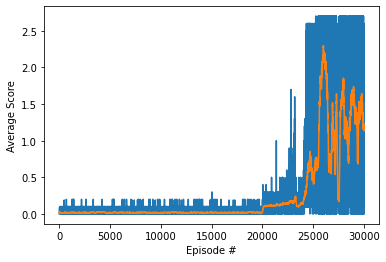

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(average_scores)+1), average_scores)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.show()

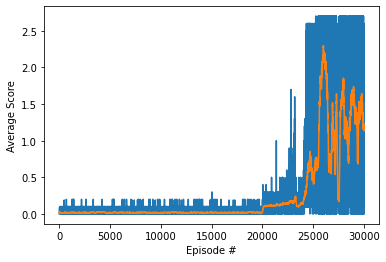

In [20]:
matplotlib.use('Agg')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(average_scores)+1), average_scores)
plt.ylabel('Average Score')
plt.xlabel('Episode #')

plt.savefig('./rewards.png')

In [21]:
for agent_num in range(num_agents):
    agent.maddpg_agent[agent_num].actor_local.load_state_dict(torch.load('saved_model_weights/checkpoint_actor_' + str(agent_num) + '.pth'))
    agent.maddpg_agent[agent_num].critic_local.load_state_dict(torch.load('saved_model_weights/checkpoint_critic_' + str(agent_num) + '.pth'))
    
    
n_episodes = 10
max_t = 3000

scores_list = []

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations                         # get the current state (for each agent)
    scores = [0,0]
    for t in range(max_t):      
        actions = agent.act(states, eps=0)                        # select an action (for each agent)
        env_info = env.step(actions)[brain_name]                  # send all actions to tne environment
        next_states = env_info.vector_observations                # get next state (for each agent)
        rewards = env_info.rewards                                # get reward (for each agent)
        done = env_info.local_done                                # see if episode finished
#         agent.step(states, actions, rewards, next_states, done)
        states = next_states                                      # roll over states to next time step
        scores = [sum(x) for x in zip(scores, rewards)]           # # update the score
        if done[0]:
            break 
    score = np.max(scores)
    scores_list.append(score)
    print('Episode {}\tScore: {:.2f}'.format(i_episode, score))
    
print('Average_score: {}'.format(np.mean(scores_list)))

Episode 1	Score: 1.40
Episode 2	Score: 0.09
Episode 3	Score: 2.60
Episode 4	Score: 2.60
Episode 5	Score: 2.70
Episode 6	Score: 2.70
Episode 7	Score: 2.60
Episode 8	Score: 2.60
Episode 9	Score: 2.70
Episode 10	Score: 2.70
Average_score: 2.2690000338479877


In [22]:
# env.close()